# NLP - Kickstarter
From the point of view of investors, the risk of losing one's capital as a result of a failed investment is high for them.
Kickstarter's project have few risky characteristics for backers who want to invest in successful projects: 
- Items are frequently new and not evaluated in a mature market before.
- Creators may be unskilled and lack the necessary abilities to develop and launch products.

As a result, backers appears to be sort of Venture Capitalist. The only difference is that in this case, instead of equity, backers pledge money in exchange for a (usually tangible) reward. 

Therefore, taking the perspective of backers, we would only put money into initiatives that have the best chance of succeeding. Given the vast number of projects on Kickstarter, there would be plenty of high-probability-of-success campaigns to pick from.

With NLP, we will try to fit a model and evaluate its **precision**, since this appears to be the most relevant metrics. Out of the projects that the model predicted would be successes, how many turned out to be actual successes?

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<AxesSubplot:>

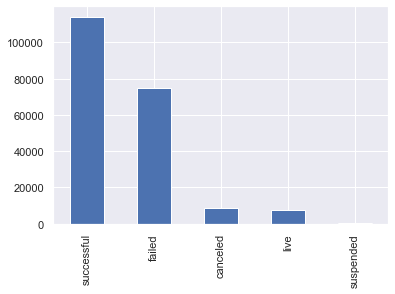

In [3]:
# Create NLP dataset
dataset = pd.read_csv('CLeaned_Kickstarter.csv')
df_nlp = dataset[['project_id', 'state', 'slug', 'blurb']]
df_nlp['state'].value_counts().plot(kind='bar')

#df_nlp = df[df.state != 'live']
# slug is equal to name, should we do an analysis for the blurb and another for the slug? 
# E.g. blurb for project 16327 is Goal: Raise $5000 by December 31st. NLP here should be problematic

<AxesSubplot:>

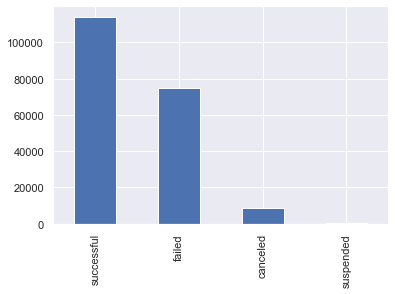

In [4]:
df_nlp = df_nlp[df_nlp.state != 'live']
df_nlp['state'].value_counts().plot(kind='bar')
# Has more sense to drop also canceled and suspended?

In [5]:
# Check and remove missing values
# df_nlp.isna().sum() # there was 10 null blurbs
df_nlp=df_nlp.dropna()
# 1 success, 0 failure
df_nlp["state"] = df_nlp["state"].replace({'failed' : 0, 'successful': 1})
df_nlp

,project_id,state,slug,blurb
0,3251221,1,believing-heart-tarot-deck,Believing Heart Tarot is a one of a kind addit...
1,860485,0,zone-7-street-arts-initiative,Be a part of Street Art Magic and have a hand ...
2,1102377,1,loving-becca-journey-of-child-loss,My writing changed after my daughter was kille...
3,2531031,0,the-sweet-botanist-syrup-co,The Sweet Botanist's natural syrups are made s...
4,95060,1,el-capitan-film-restoration,The digital restoration of the classic 1968 Ro...
...,...,...,...,...
205691,16327,1,new-media-elective-at-june-jordan-school-for-e...,Goal: Raise $5000 by December 31st to provide ...
205692,2428607,1,my-first-album-8,Since I was 4 years old my dream has been to b...
205693,71699,1,story-forge-brainstorming-cards-for-storytellers,The ultimate tool for quickly and easily brain...
205694,2426288,1,scythe-a-realistic-slasher-film,A psychological slasher thriller WITHOUT all t...


<AxesSubplot:>

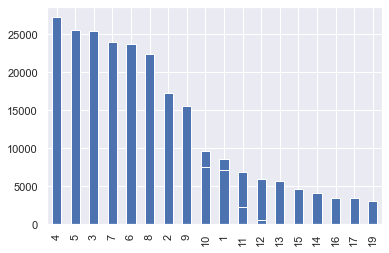

In [18]:
#Name: Word length
df_nlp['slug_len'] = df_nlp['slug'].str.split("-").str.len()

#Blurb: Word length
df_nlp['blurb_len'] = df_nlp['blurb'].str.split().str.len()


# Histogram 
df_nlp['blurb_len'].value_counts().plot(kind='bar')
df_nlp['slug_len'].value_counts().plot(kind='bar')

In [1]:
# Preprocessing
# Lowercase
# Check if there are html tags
# Convert accented characters to ASCII characters
# Removing extra whitespaces
#Removing punctuation and special characters
# Converting number words to numeric form removing numbers
# Conversion / Expansion of the Short form Definitions
contractions_dict = {
    'didn\'t': 'did not',
    'don\'t': 'do not',
    "aren't": "are not",
    "can't": "cannot",
    "cant": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "didnt": "did not",
    "doesn't": "does not",
    "doesnt": "does not",
    "don't": "do not",
    "dont" : "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'm": "i am",
    "im": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
    }

##Creating a Function for the Created Expansion Code
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

NameError: name 're' is not defined

In [ ]:
# Stemming ?? Porter's algorithm
# Lemmatization

In [ ]:
import nltk

# Normalize words
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    doc = doc.lower() #convert to lower case
    doc = expand_contractions(doc) #apply contraction-expansion function
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) #substitute any character that is not a-z or A-Z
    
    doc = doc.strip()
    # tokenize document - Split the Sentence into Words
    tokens = nltk.word_tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

dataset['blurb'] = dataset['blurb'].apply(normalize_document)

In [ ]:
# removing all non-alphabetical characters followed by converting the words to lowercases. 

# Here, we assume that non-character words, such as numbers and punctuation, play a minimal role in prediction. 
# The words are also then stemmed into their root words, and Stop Words are also removed.

In [ ]:
# Bag of words, check frequency

In [ ]:
# Train and test datasets
Text = dataset['blurb'].values
Label = dataset['state'].values



In [ ]:
# Create bag of words Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500) #Keep top 2500 most frequently used words
X=cv.fit_transform(corpus).toarray() #Develop a sparse matrix for every word
y=dataset.iloc[0:len(dataset[‘blurb’]),3].values


# Consider only the **** most used words. Understand the number by trying which one makes more difference


In [ ]:
# Word Cloud
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
text=""
for i in range(len(dataset.blurb)):
    if i==44343 or i==62766 or i==97999:
        continue
    text=text+str(dataset.blurb[i])
    
wordcloud = WordCloud(max_font_size=50, max_words=40,background_color="white").generate(text.lower())
plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Fitting our classifier
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


In [ ]:
# Predictions
pred=classifier.predict_proba(X_test)[:,1]
pred=pred>0.9
pred=pred.astype(int)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
precision=cm[1,1]/(cm[0,1]+cm[1,1])
print("Precision is "+precision)

In [ ]:
# Try neural network thwough the bag of words model
# Use Word2vec to convert the words to vectors through the GloVe data, and then run a neural network through it. I have even attempted to cluster the observations through K-Means clustering based on the descriptions to achieve better results. Dimensionality reduction techniques did not do much as well.
#Despite their greater sophistication and purported effectiveness with text, these models could not beat the accuracy of a simple Logsitic Regression. In fact, such models took a much longer processing time.

In [ ]:
# Tfid
from sklearn.feature_extraction.text import TfidfVectorizer
# https://github.com/sridhar-e/Kickstarter-Projects-NLP/blob/master/Kickstarter-Projects-NLP.py